## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

### 之前做過的處理

In [2]:
# 設定 data_path
dir_data = '../data/'
f_app_train = os.path.join(dir_data, 'application_train.csv')
f_app_test = os.path.join(dir_data, 'application_test.csv')

app_train = pd.read_csv(f_app_train)
app_test = pd.read_csv(f_app_test)

from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
# also apply to testing dataset
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# absolute the value of DAYS_BIRTH
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])

In [3]:
#print(len(app_train))
sub_df = app_train.loc[:, ['DAYS_EMPLOYED', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH']]
#print(len(sub_df[sub_df['DAYS_EMPLOYED'].isnull()]))
#print(len(sub_df))
sub_df = sub_df.dropna()
#print(len(sub_df))
#print(sub_df.head(10))
print(sub_df.describe())
#print(sub_df['DAYS_EMPLOYED'].value_counts())

       DAYS_EMPLOYED  AMT_INCOME_TOTAL     DAYS_BIRTH
count  252137.000000      2.521370e+05  252137.000000
mean    -2384.169325      1.759141e+05   14769.133174
std      2338.360162      2.588516e+05    3662.573769
min    -17912.000000      2.565000e+04    7489.000000
25%     -3175.000000      1.125000e+05   11775.000000
50%     -1648.000000      1.575000e+05   14573.000000
75%      -767.000000      2.115000e+05   17563.000000
max         0.000000      1.170000e+08   25200.000000


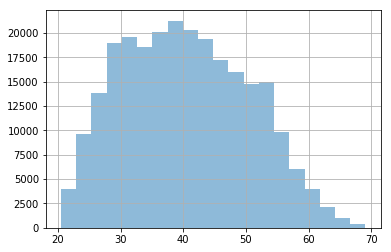

In [4]:
cnt_bin = 20
sub_df_hist = sub_df.copy()
sub_df_hist['DAYS_BIRTH_bin'] = sub_df['DAYS_BIRTH']/365
#sub_df_hist
sub_df_hist['DAYS_BIRTH_bin'].hist(bins=cnt_bin, alpha=0.5)


### 等寬劃分

In [5]:
cnt_bin = 10
sub_df_fixcut = sub_df.copy()
sub_df_fixcut['DAYS_BIRTH_bin'] = pd.cut(sub_df['DAYS_BIRTH']/365, cnt_bin)
sub_df_fixcut['DAYS_BIRTH_bin'].value_counts().sort_index()

(20.469, 25.37]     13627
(25.37, 30.222]     32897
(30.222, 35.075]    38209
(35.075, 39.927]    41348
(39.927, 44.779]    39707
(44.779, 49.632]    33204
(49.632, 54.484]    29720
(54.484, 59.336]    15889
(59.336, 64.189]     6120
(64.189, 69.041]     1416
Name: DAYS_BIRTH_bin, dtype: int64

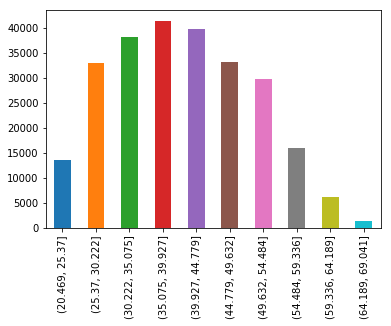

In [6]:
sub_df_fixcut['DAYS_BIRTH_bin'].value_counts().sort_index().plot(kind='bar');

### 等頻劃分

In [7]:
cnt_bin = 10
sub_df_qcut = sub_df.copy()
sub_df_qcut['DAYS_BIRTH_bin'] = pd.qcut(sub_df['DAYS_BIRTH']/365, cnt_bin)
sub_df_qcut['DAYS_BIRTH_bin'].value_counts().sort_index()

(20.517, 27.537]    25231
(27.537, 30.721]    25222
(30.721, 33.877]    25202
(33.877, 37.044]    25203
(37.044, 39.926]    25223
(39.926, 42.956]    25213
(42.956, 46.277]    25203
(46.277, 50.049]    25212
(50.049, 54.197]    25218
(54.197, 69.041]    25210
Name: DAYS_BIRTH_bin, dtype: int64

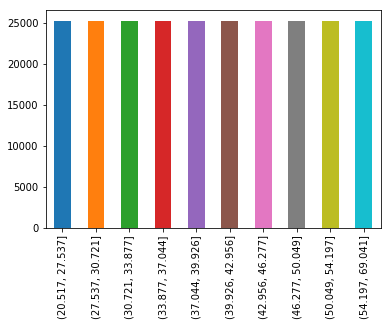

In [8]:
sub_df_qcut['DAYS_BIRTH_bin'].value_counts().sort_index().plot(kind='bar');

### 等寬(自訂)劃分

In [9]:
cnt_bin = 20
sub_df_custcut = sub_df.copy()
cut_off = np.linspace(0, 100, cnt_bin+1)
sub_df_custcut['DAYS_BIRTH_bin'] = pd.cut(sub_df['DAYS_BIRTH']/365, cut_off)
sub_df_custcut['DAYS_BIRTH_bin'].value_counts().sort_index()

(0.0, 5.0]           0
(5.0, 10.0]          0
(10.0, 15.0]         0
(15.0, 20.0]         0
(20.0, 25.0]     12125
(25.0, 30.0]     32760
(30.0, 35.0]     39281
(35.0, 40.0]     42525
(40.0, 45.0]     40768
(45.0, 50.0]     33950
(50.0, 55.0]     30631
(55.0, 60.0]     14096
(60.0, 65.0]      5172
(65.0, 70.0]       829
(70.0, 75.0]         0
(75.0, 80.0]         0
(80.0, 85.0]         0
(85.0, 90.0]         0
(90.0, 95.0]         0
(95.0, 100.0]        0
Name: DAYS_BIRTH_bin, dtype: int64

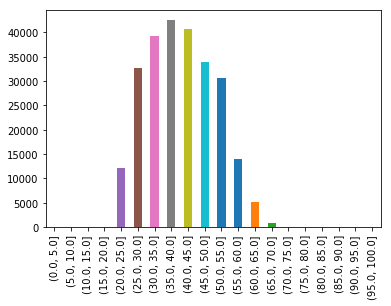

In [10]:
sub_df_custcut['DAYS_BIRTH_bin'].value_counts().sort_index().plot(kind='bar')

In [11]:
print(sub_df_fixcut['DAYS_BIRTH_bin'].value_counts().sort_index())
print()
print(sub_df_qcut['DAYS_BIRTH_bin'].value_counts().sort_index())
print()
print(sub_df_custcut['DAYS_BIRTH_bin'].value_counts().sort_index())
print()


(20.469, 25.37]     13627
(25.37, 30.222]     32897
(30.222, 35.075]    38209
(35.075, 39.927]    41348
(39.927, 44.779]    39707
(44.779, 49.632]    33204
(49.632, 54.484]    29720
(54.484, 59.336]    15889
(59.336, 64.189]     6120
(64.189, 69.041]     1416
Name: DAYS_BIRTH_bin, dtype: int64

(20.517, 27.537]    25231
(27.537, 30.721]    25222
(30.721, 33.877]    25202
(33.877, 37.044]    25203
(37.044, 39.926]    25223
(39.926, 42.956]    25213
(42.956, 46.277]    25203
(46.277, 50.049]    25212
(50.049, 54.197]    25218
(54.197, 69.041]    25210
Name: DAYS_BIRTH_bin, dtype: int64

(0.0, 5.0]           0
(5.0, 10.0]          0
(10.0, 15.0]         0
(15.0, 20.0]         0
(20.0, 25.0]     12125
(25.0, 30.0]     32760
(30.0, 35.0]     39281
(35.0, 40.0]     42525
(40.0, 45.0]     40768
(45.0, 50.0]     33950
(50.0, 55.0]     30631
(55.0, 60.0]     14096
(60.0, 65.0]      5172
(65.0, 70.0]       829
(70.0, 75.0]         0
(75.0, 80.0]         0
(80.0, 85.0]         0
(85.0, 90.0]     

### [DAYS_BIRTH_bin] vs [AMT_INCOME_TOTAL]

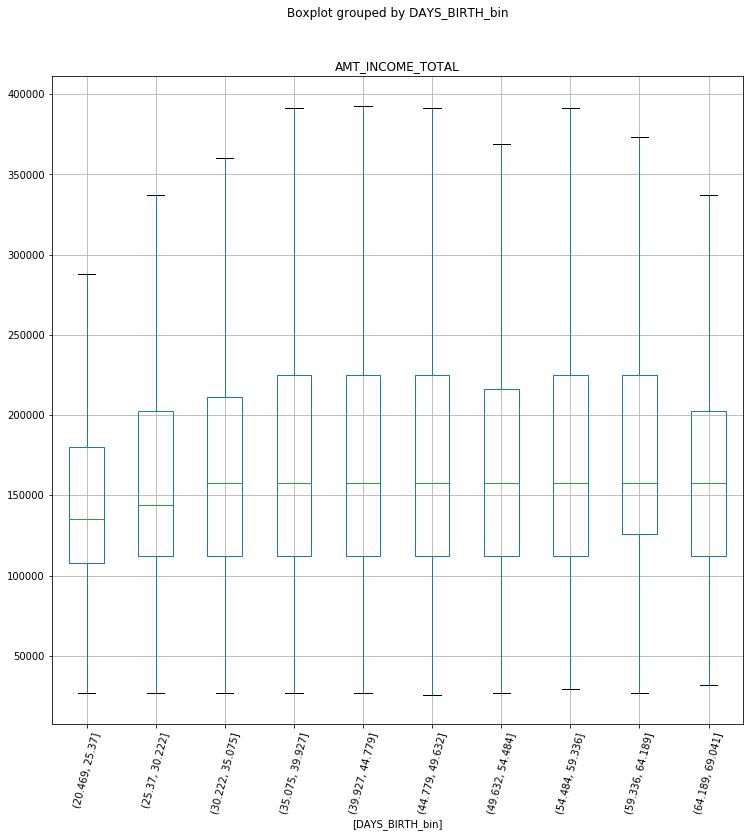

In [12]:
plt_column = ['AMT_INCOME_TOTAL']
plt_by = ['DAYS_BIRTH_bin']

sub_df_fixcut.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.xticks(rotation = 75)
plt.show()

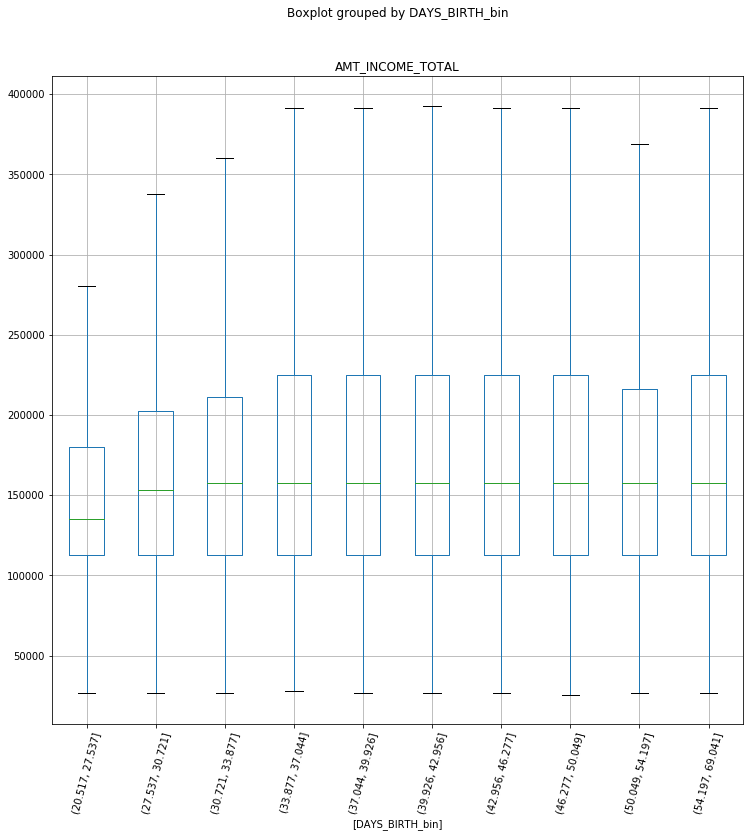

In [13]:
plt_column = ['AMT_INCOME_TOTAL']
plt_by = ['DAYS_BIRTH_bin']

sub_df_qcut.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.xticks(rotation = 75)
plt.show()